In [45]:
import numpy as np
import matplotlib.pyplot as plt 

Semi-empirical Mass Formula

In [46]:
def bindingEnergy(A,Z):
    (a1,a2,a3,a4)=(15.67,17.23,0.75,93.2)
    if A%2==1:
        a5=0
    if A%2==0 and Z%2 == 0:
        a5=12.0
    if A%2==0 and Z%2 == 1:
        a5=-12.0
    B = a1*A - a2*A**(2/3) - a3*(Z**2)/(np.cbrt(A)) - a4*((A-2*Z)**2)/A + a5/(np.sqrt(A))
    return B

def BEN(A,Z):
    return bindingEnergy(A,Z)/A

def mostStableNucleus(Z, result='mben', printResults=True):
    myList = [BEN(A,Z) for A in range(Z, 3*Z+1)]
    
    maxA= myList.index(max(myList))+Z
    if printResults:
        print('Maximum binding energy per nucleon: {:.3f} MeV'.format(max(myList)))
        print('Nucleon number: {}'.format(maxA))
        print('Atomic number: {}'.format(Z))
    if result=='mben':
        return max(myList)
    if result=='A':
        return maxA


In [47]:
bindingEnergy(58,28)
mostStableNucleus(2)

Maximum binding energy per nucleon: 5.843 MeV
Nucleon number: 4
Atomic number: 2


5.843309761445089

In [48]:
benList=[]
a_list, z_list = [], []
for Z in range(1,101):
    z_list.append(Z)
    benList.append(mostStableNucleus(Z, result='mben' , printResults=False))
    A=mostStableNucleus(Z, result='A' , printResults=False)
    a_list.append(A)
    ben= mostStableNucleus(Z, printResults=False)
    print(f'Z: {Z}, A: {A}, BEN: {np.round(ben,3)} MeV')
mostStableZ=benList.index(max(benList))+1
mostStableA=mostStableNucleus(mostStableZ, result='A', printResults=False)
print(f'Maximum BEN: {max(benList)}, Atomic number: {mostStableZ}, Nucleon number: {mostStableA}')



Z: 1, A: 2, BEN: -2.546 MeV
Z: 2, A: 4, BEN: 5.843 MeV
Z: 3, A: 6, BEN: 4.752 MeV
Z: 4, A: 8, BEN: 6.835 MeV
Z: 5, A: 10, BEN: 6.423 MeV
Z: 6, A: 12, BEN: 7.45 MeV
Z: 7, A: 15, BEN: 7.276 MeV
Z: 8, A: 16, BEN: 7.829 MeV
Z: 9, A: 19, BEN: 7.757 MeV
Z: 10, A: 20, BEN: 8.075 MeV
Z: 11, A: 23, BEN: 8.048 MeV
Z: 12, A: 24, BEN: 8.239 MeV
Z: 13, A: 27, BEN: 8.234 MeV
Z: 14, A: 28, BEN: 8.348 MeV
Z: 15, A: 31, BEN: 8.355 MeV
Z: 16, A: 32, BEN: 8.419 MeV
Z: 17, A: 35, BEN: 8.433 MeV
Z: 18, A: 36, BEN: 8.463 MeV
Z: 19, A: 39, BEN: 8.481 MeV
Z: 20, A: 41, BEN: 8.496 MeV
Z: 21, A: 43, BEN: 8.506 MeV
Z: 22, A: 46, BEN: 8.521 MeV
Z: 23, A: 47, BEN: 8.514 MeV
Z: 24, A: 50, BEN: 8.533 MeV
Z: 25, A: 51, BEN: 8.51 MeV
Z: 26, A: 54, BEN: 8.53 MeV
Z: 27, A: 55, BEN: 8.495 MeV
Z: 28, A: 58, BEN: 8.516 MeV
Z: 29, A: 59, BEN: 8.471 MeV
Z: 30, A: 62, BEN: 8.494 MeV
Z: 31, A: 63, BEN: 8.441 MeV
Z: 32, A: 66, BEN: 8.464 MeV
Z: 33, A: 69, BEN: 8.407 MeV
Z: 34, A: 70, BEN: 8.428 MeV
Z: 35, A: 73, BEN: 8.379 MeV


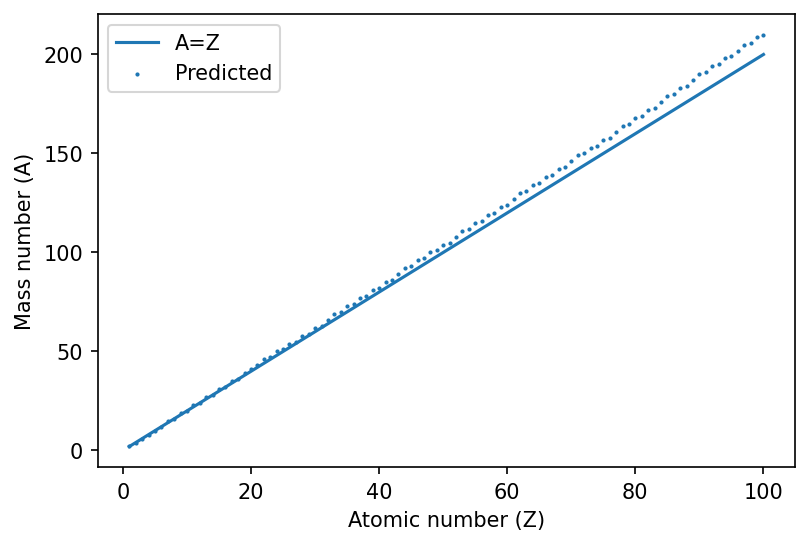

In [50]:
plt.figure(dpi=150)
plt.scatter(z_list, a_list, s=1, label='Predicted')
plt.plot(z_list, 2*np.array(z_list), label='A=Z')
plt.xlabel('Atomic number (Z)')
plt.ylabel('Mass number (A)')
plt.legend(loc='best')
plt.savefig('A vs Z plot.png', dpi=300)


Text(0, 0.5, 'Number of neutrons (N)')

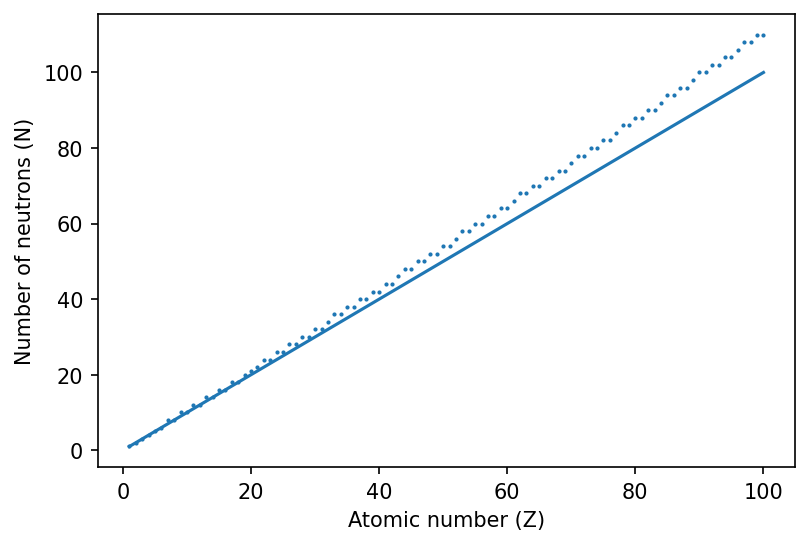

In [ ]:
plt.figure(dpi=150)
plt.scatter(z_list, np.array(a_list)-np.array(z_list), s=1)
plt.plot(z_list, z_list)
plt.xlabel('Atomic number (Z)')
plt.ylabel('Number of neutrons (N)')

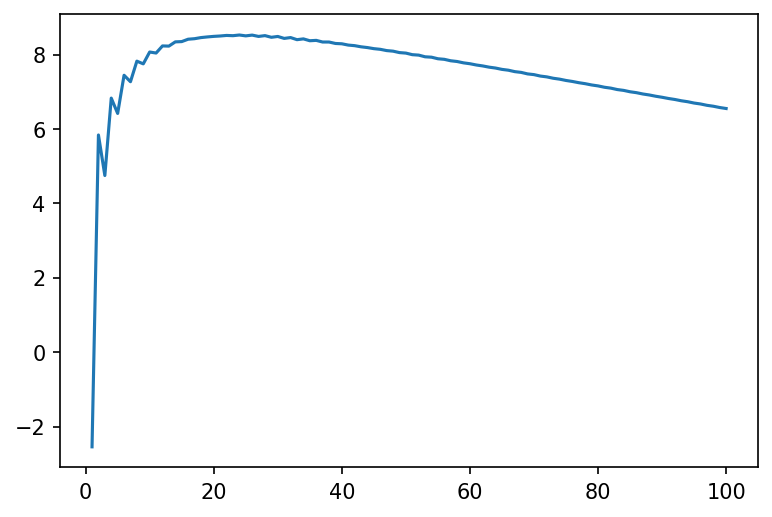

In [ ]:
plt.figure(dpi=150)
plt.plot(z_list, benList)

Binomial Coefficients

In [ ]:
def binomial(n,k):
    running_denom, running_prod = 1, 1
    for i in range(1,k+1):
        running_denom *= i 
    for j in range(n-k+1, n+1):
        running_prod *= j 
    return int(running_prod/running_denom)

In [ ]:
for n in range(1,21):
    myList=[]
    for k in range(0,n+1):
        myList.append(binomial(n,k))
    print(*myList)

1 1
1 2 1
1 3 3 1
1 4 6 4 1
1 5 10 10 5 1
1 6 15 20 15 6 1
1 7 21 35 35 21 7 1
1 8 28 56 70 56 28 8 1
1 9 36 84 126 126 84 36 9 1
1 10 45 120 210 252 210 120 45 10 1
1 11 55 165 330 462 462 330 165 55 11 1
1 12 66 220 495 792 924 792 495 220 66 12 1
1 13 78 286 715 1287 1716 1716 1287 715 286 78 13 1
1 14 91 364 1001 2002 3003 3432 3003 2002 1001 364 91 14 1
1 15 105 455 1365 3003 5005 6435 6435 5005 3003 1365 455 105 15 1
1 16 120 560 1820 4368 8008 11440 12870 11440 8008 4368 1820 560 120 16 1
1 17 136 680 2380 6188 12376 19448 24310 24310 19448 12376 6188 2380 680 136 17 1
1 18 153 816 3060 8568 18564 31824 43758 48620 43758 31824 18564 8568 3060 816 153 18 1
1 19 171 969 3876 11628 27132 50388 75582 92378 92378 75582 50388 27132 11628 3876 969 171 19 1
1 20 190 1140 4845 15504 38760 77520 125970 167960 184756 167960 125970 77520 38760 15504 4845 1140 190 20 1


Plotting

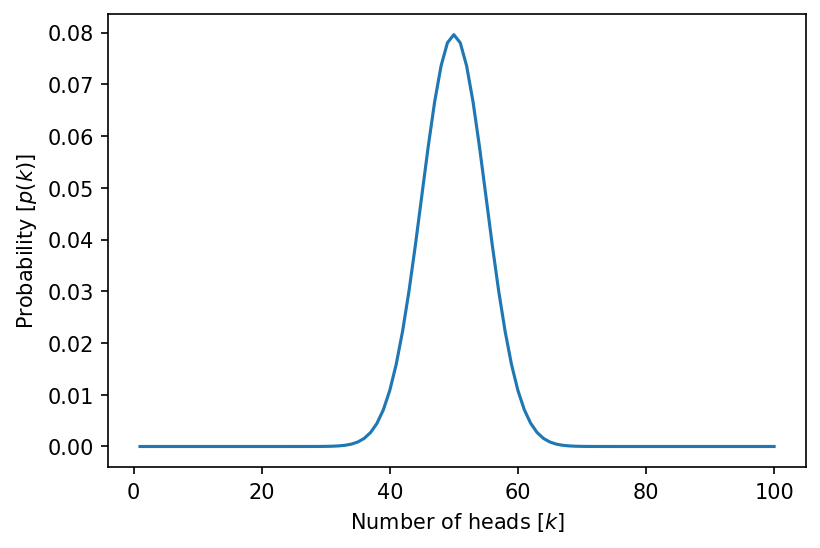

In [53]:
import seaborn as sns
k_list = np.arange(1,101)
probability = [binomial(100,k)/(2**100) for k in k_list]
plt.figure(dpi=150)
plt.plot(k_list, probability)
plt.xlabel(r'Number of heads $[k]$')
plt.ylabel(r'Probability $[p(k)]$')
plt.savefig('probability distribution.png', dpi=300)

In [ ]:
binomial(100,50)/(2**100)

0.07958923738717877